In [91]:
import numpy as np
import matplotlib.pyplot as plt

In [92]:
def f_x(x: float, y: float) -> float:
    return 10*x - 2*x*y

def g_y(x: float, y: float) -> float:
    return 2*x*y - 10*y

In [93]:
points_num: int = 1000
t: np.ndarray = np.linspace(0.0, 5., points_num)
h_n: float = t[1] - t[0]
alpha: float = 3/4

def kuta_2_system(t_distance: list, x_0: float, y_0: float) -> tuple:
    t: list = t_distance
    x_n: list = []
    y_n: list = []
    x_n.append(x_0)
    y_n.append(y_0)
    for i, _ in enumerate(t, 1):
        delta_x: float = x_n[i-1] + h_n*((1-alpha)*f_x(x_n[i-1], y_n[i-1]) + alpha*f_x(x_n[i-1] + h_n/(2*alpha)*f_x(x_n[i-1], y_n[i-1]), y_n[i-1] + h_n/(2*alpha)*g_y(x_n[i-1], y_n[i-1])))
        delta_y: float = y_n[i-1] + h_n*((1-alpha)*g_y(x_n[i-1], y_n[i-1]) + alpha*g_y(x_n[i-1] + h_n/(2*alpha)*f_x(x_n[i-1], y_n[i-1]), y_n[i-1] + h_n/(2*alpha)*g_y(x_n[i-1], y_n[i-1])))
        x_n.append(delta_x)
        y_n.append(delta_y)
    return x_n, y_n

C:\Users\Dennis\AppData\Local\Temp\ipykernel_11800\2272318071.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(211)


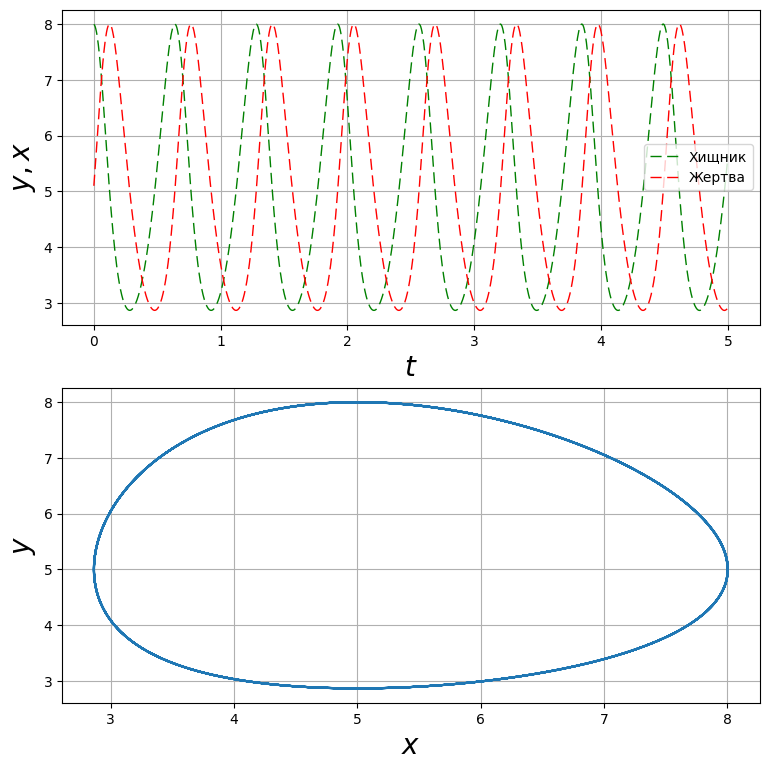

In [115]:
x_n, y_n = kuta_2_system(t, 8., 5.1)
x_n = x_n[:-1]
y_n = y_n[:-1]

plt.figure(figsize=(9,9))
plt.title('Хищник и жертва')
plt.subplot(211)
plt.grid(True)
plt.plot(t, x_n, linewidth=1, color='g', dashes=[8, 4], label=r'Хищник')
plt.plot(t, y_n, linewidth=1, color='r', dashes=[8, 4], label=r'Жертва' )
plt.xlabel(r'$t$', fontsize=20)
plt.ylabel(r'$y, x$', fontsize=20)
plt.legend()
plt.subplot(212)
plt.plot(x_n, y_n, label=r'Фазовая траектория x, y')
plt.xlabel(r'$x$', fontsize=20)
plt.ylabel(r'$y$', fontsize=20)
plt.grid(True)
plt.show()